In [1]:
import requests
import pandas as pd
import numpy as np
# import config
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as st
from pandas_profiling import ProfileReport
import sweetviz as sv

register_matplotlib_converters()
sns.set(style="whitegrid", palette= "muted", font_scale =1.5)
rcParams['figure.figsize']=100,50

In [95]:
submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

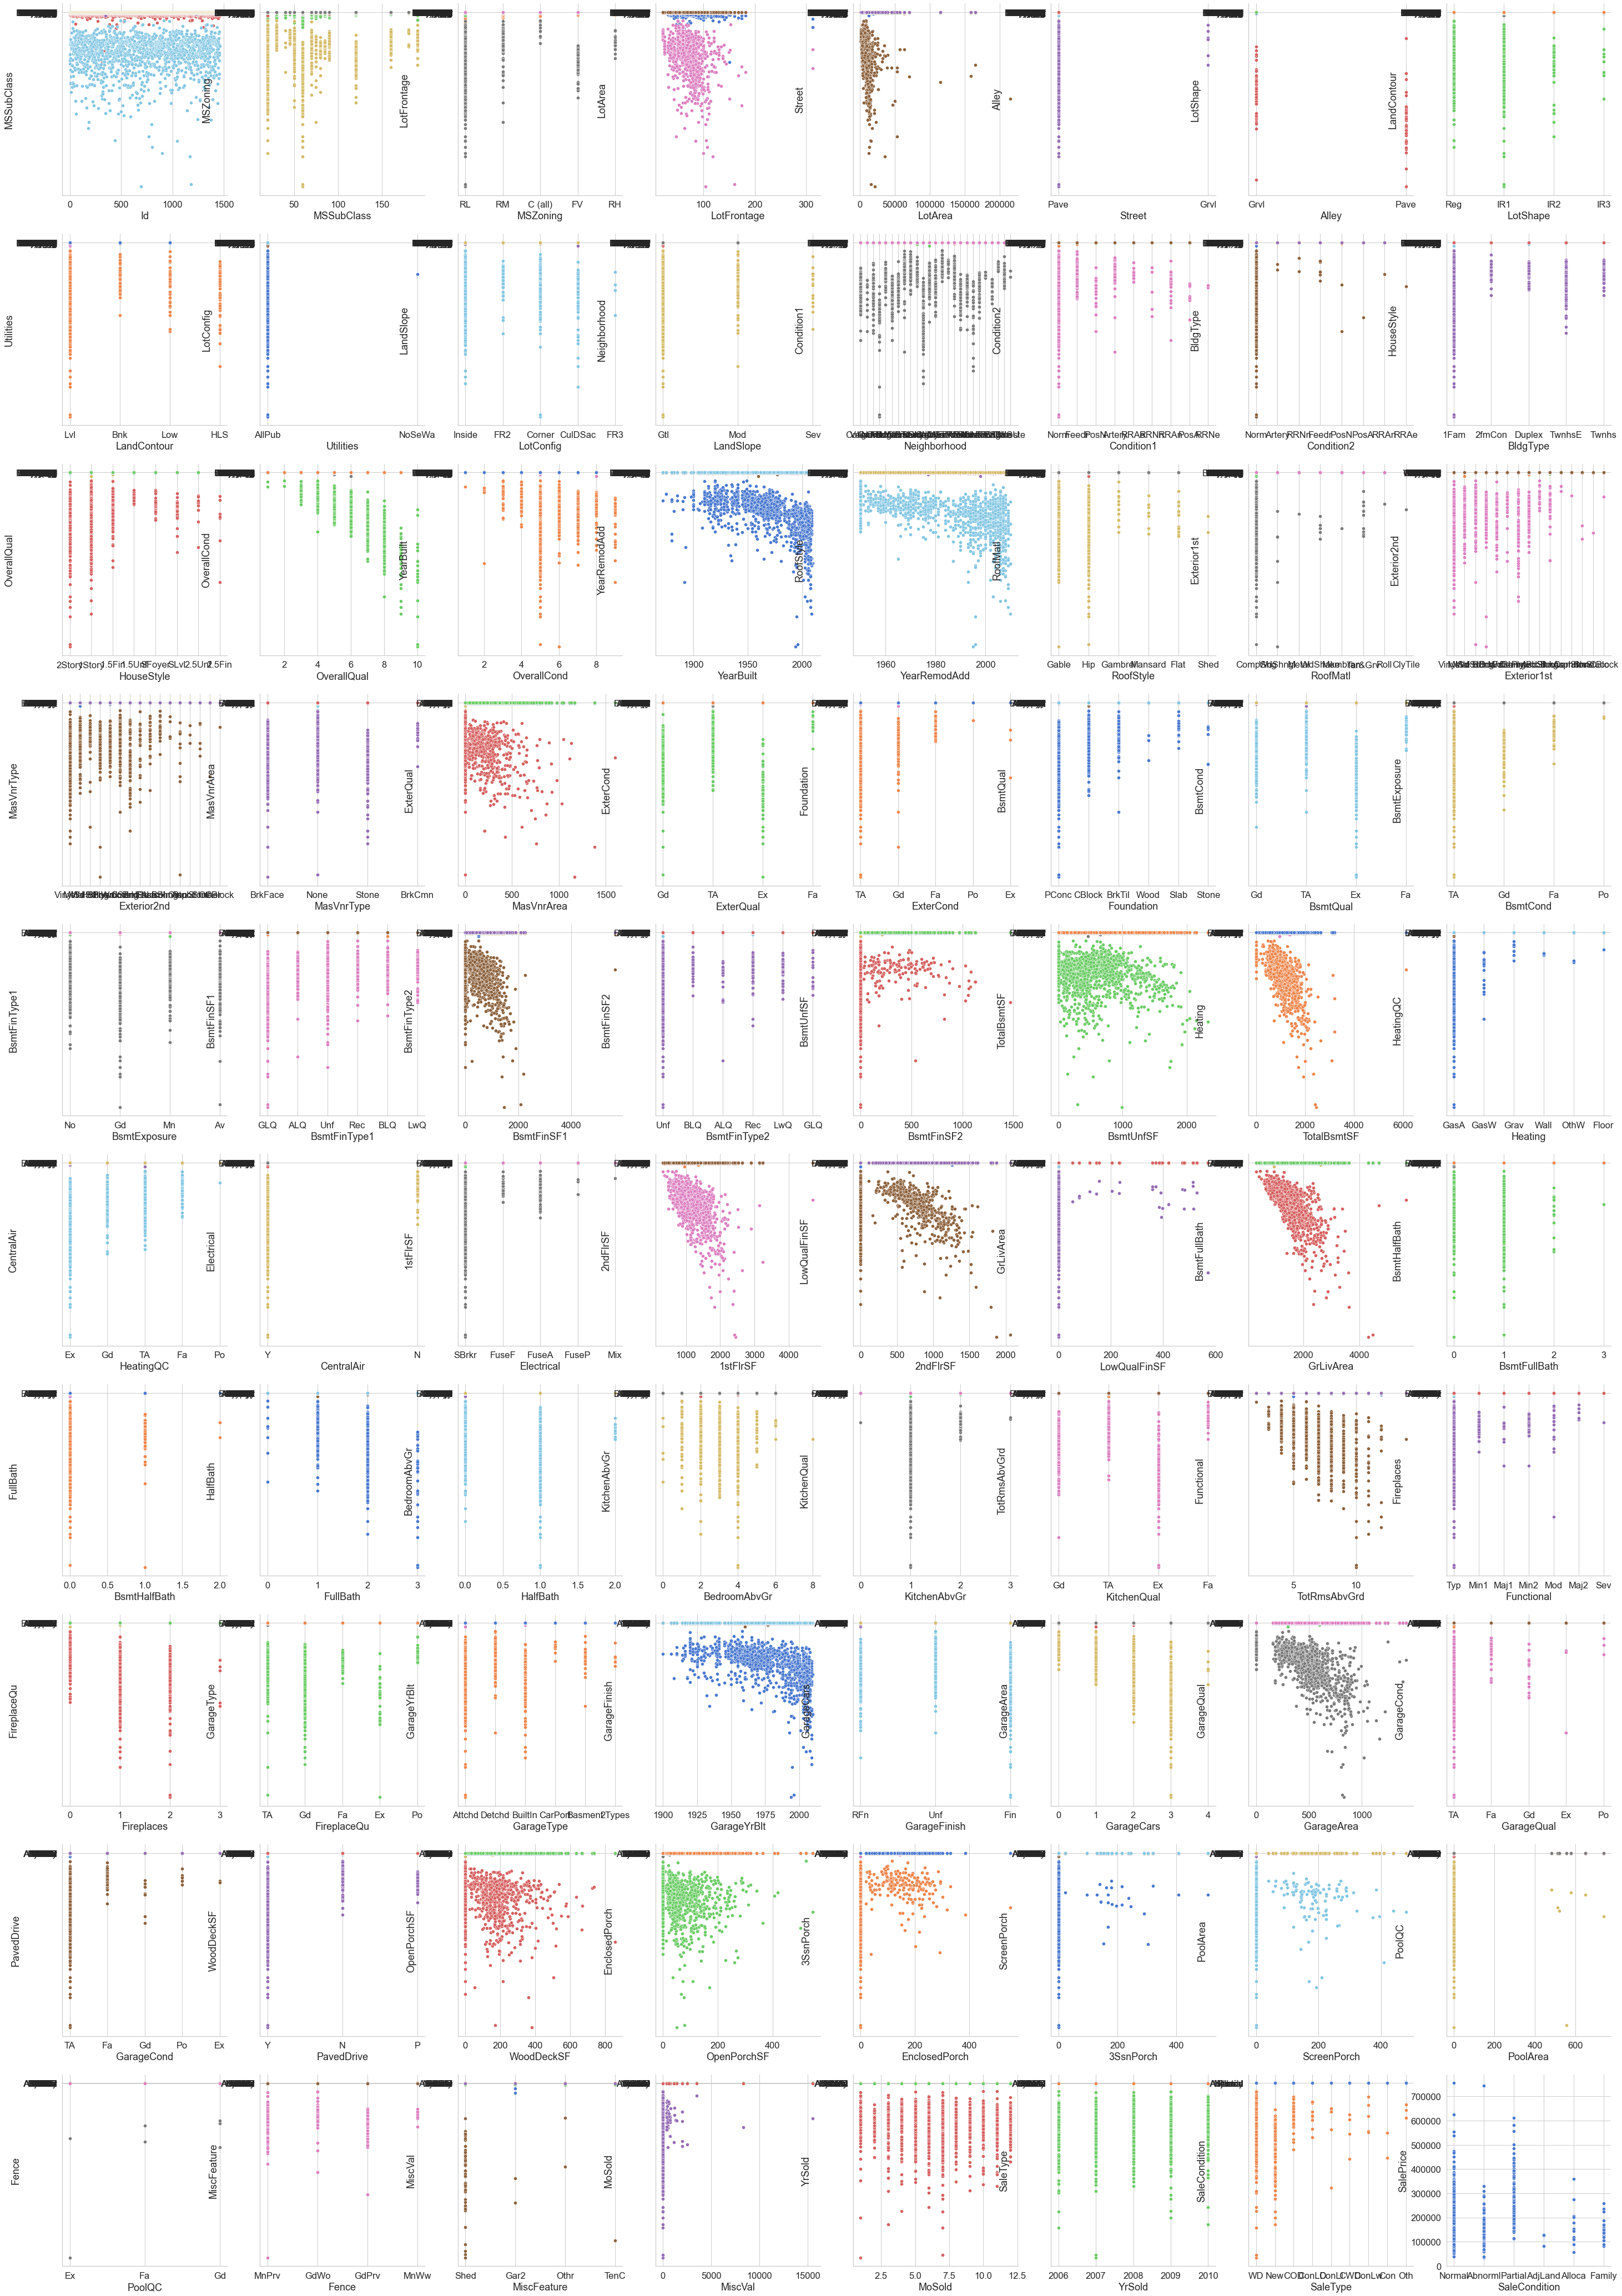

In [6]:
ig,axs=plt.subplots(10,8,figsize=(50,75))
axs = axs.ravel()
pd.set_option("display.max_columns",None)

for i,col1 in enumerate(train.columns):
    for j,col2 in enumerate(train.columns):
        if i<j:
            # print(col1 + " "+ col2)
            sns.scatterplot(data =train,x = train[col1],y=train[col2], ax = axs[i], sizes = (20,200),legend="full",palette="deep",alpha=1)
            sns.despine()
plt.savefig(r"D:\Projects\Kaggle\House Prices\scatterplot.png")

In [7]:
my_report = sv.analyze(train)
my_report.show_html(filepath="train.html")

                                             |          | [  0%]   00:00 -> (? left)

Report train.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [453]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [454]:
corr = train.corr()

In [455]:
#cor_matrix.dropna(inplace=True)
list_x=list()
list_y=list()
list_cor=list()
for x in corr.columns:
    for y in corr.columns:
        if abs(corr[x][y])>0.7 and x<y:
           list_x.append(x)
           list_y.append(y)
           list_cor.append(corr[x][y])

In [456]:
cor=pd.DataFrame()
cor['x']=list_x
cor['y']=list_y
cor['cor_value']=list_cor


In [457]:
cor

,x,y,cor_value
0,OverallQual,SalePrice,0.790982
1,1stFlrSF,TotalBsmtSF,0.819530
2,GrLivArea,TotRmsAbvGrd,0.825489
3,GrLivArea,SalePrice,0.708624
4,GarageYrBlt,YearBuilt,0.825667
5,GarageArea,GarageCars,0.882475


In [458]:
train['OverallQual'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: OverallQual
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [459]:
train['GrLivArea'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GrLivArea
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [460]:
from scipy import stats
_p=list()
for i in range(len(cor)):
    _p.append(stats.spearmanr(train[cor['x'][i]], train[cor['y'][i]],nan_policy='omit')[1])
cor['p_value']= _p

In [461]:
cor.loc[cor["p_value"]>0.0005]

,x,y,cor_value,p_value


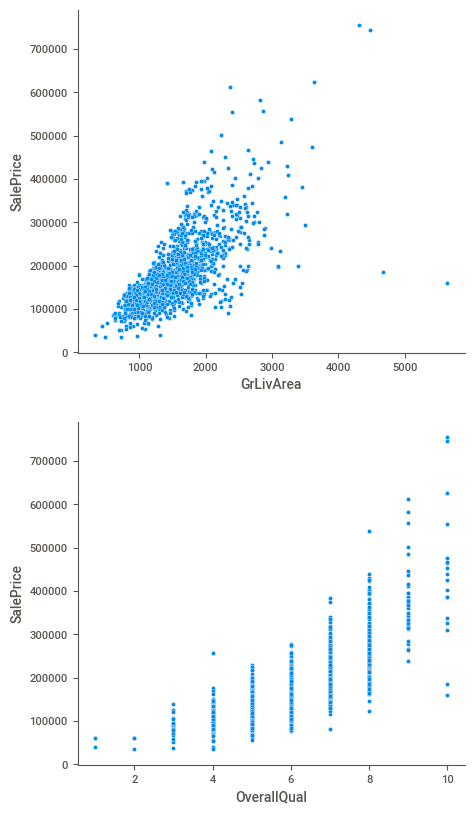

In [462]:
ig,axs=plt.subplots(2,1,figsize=(5,10))
axs = axs.ravel()
pd.set_option("display.max_columns",None)
sns.scatterplot(data =train,x = train['GrLivArea'],y=train['SalePrice'], ax = axs[0], sizes = (20,200),legend="full",palette="deep",alpha=1)
sns.scatterplot(data =train,x = train['OverallQual'],y=train['SalePrice'], ax = axs[1], sizes = (20,200),legend="full",palette="deep",alpha=1)
sns.despine()


In [463]:
cat_train = train.select_dtypes(include='object')

In [464]:
cat_train

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [652]:
full_train= train.copy()

In [653]:
for cal in cat_train.columns:
    cat_variables = full_train[[cal]]
    cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
    # cat_dummies.head()
    full_train = full_train.drop([cal], axis=1)
    full_train = pd.concat([full_train, cat_dummies], axis=1)
    # train.head()

In [654]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 290 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(252)
memory usage: 792.9 KB


In [655]:
full_train["OverallQual"]

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [650]:
for col in full_train.columns:
    if full_train[col].dtype == "uint8":
        full_train[col]=full_train[col].astype("int64")

In [651]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 247 entries, Id to SaleCondition_Partial
dtypes: float64(247)
memory usage: 2.8 MB


In [613]:
corr = full_train.corr()

In [614]:
corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, Id to SaleCondition_Partial
Columns: 247 entries, Id to SaleCondition_Partial
dtypes: float64(247)
memory usage: 486.7+ KB


In [615]:
#cor_matrix.dropna(inplace=True)
list_x=list()
list_y=list()
list_cor=list()
for i,x in enumerate(corr.columns):
    for j,y in enumerate(corr.columns):

        if abs(corr[x][y])>=0.7 and i<j:
           list_x.append(x)
           list_y.append(y)
           list_cor.append(corr[x][y])
cor=pd.DataFrame()
cor['x']=list_x
cor['y']=list_y
cor['cor_value']=list_cor
_p=list()
for i in range(len(cor)):
    _p.append(stats.spearmanr(full_train[cor['x'][i]], full_train[cor['y'][i]],nan_policy='omit')[1])
cor['p_value']= _p

In [616]:
cor

,x,y,cor_value,p_value
0,OverallQual,SalePrice,0.790982,0.000000e+00
1,YearBuilt,GarageYrBlt,0.825667,0.000000e+00
2,BsmtFinSF2,BsmtFinType2_Unf,-0.716235,0.000000e+00
3,TotalBsmtSF,1stFlrSF,0.819530,0.000000e+00
4,2ndFlrSF,HouseStyle_1Story,-0.788749,0.000000e+00
5,2ndFlrSF,HouseStyle_2Story,0.809150,0.000000e+00
6,GrLivArea,TotRmsAbvGrd,0.825489,0.000000e+00
7,GrLivArea,SalePrice,0.708624,1.431015e-244
8,GarageCars,GarageArea,0.882475,0.000000e+00
9,MSZoning_FV,Neighborhood_Somerst,0.862807,0.000000e+00


In [617]:
cor.loc[cor["p_value"]>0.05]

,x,y,cor_value,p_value


In [618]:
for col in full_train.columns:
    if full_train[col].isna().sum()!= 0:
        print(col,full_train[col].isna().sum())

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


In [619]:
corr['SaleCondition_Partial'].loc[corr['SaleCondition_Partial']>0.7]

SaleType_New             0.986819
SaleCondition_Partial    1.000000
Name: SaleCondition_Partial, dtype: float64

In [620]:
for col in full_train:
    q75,q25 = np.percentile(full_train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    full_train.loc[full_train[x] < min,x] = np.nan
    full_train.loc[full_train[x] > max,x] = np.nan

In [621]:
for col in full_train.columns:
    if full_train[col].isna().sum()!= 0:
        print(col,full_train[col].isna().sum())

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81
SaleCondition_Partial 125


In [622]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
knn = imputer.fit(full_train)
full_train=pd.DataFrame(knn.transform(full_train),columns=full_train.columns)

In [623]:
corr['SaleCondition_Partial'].loc[corr['SaleCondition_Partial']>0.7]

SaleType_New             0.986819
SaleCondition_Partial    1.000000
Name: SaleCondition_Partial, dtype: float64

In [624]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 247 entries, Id to SaleCondition_Partial
dtypes: float64(247)
memory usage: 2.8 MB


In [625]:
full_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548

In [636]:
y = full_train["SalePrice"]
X = full_train.drop(["SalePrice","Id"], axis =1)
from sklearn.model_selection import cross_val_score,train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y , test_size=0.2)

In [637]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
  
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)


In [638]:
x_train.shape

(1168, 245)

In [643]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,LinearRegression,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR

from math import sqrt
from sklearn.metrics import mean_squared_error
def models_seletion(x_train,y_train):
    models = {
    "Lasso": Lasso(),
    "RF": RandomForestRegressor(),
    "GBM": GradientBoostingRegressor(),
    "SVM": LinearSVR(), 
    "LR":LinearRegression(),
    "DTR":DecisionTreeRegressor(),
    "AB":AdaBoostRegressor(),
    "Ridge":Ridge(),
    "ENet":ElasticNet()

    }
    df_score=pd.DataFrame(columns=['model_name','RMSE_train_score','RMSE_test_score'])
    list_name=[]
    scores_train =[]
    scores_test = []
    for name,model in models.items():
        regr=model
        regr.fit(x_train,y_train)
        train_pred =regr.predict(x_train)
        train_rmse= sqrt(mean_squared_error(y_train,train_pred))
        test_pred =regr.predict(x_test)
        test_rmse= sqrt(mean_squared_error(y_test,test_pred))

        list_name.append(name)
        scores_train.append(round(train_rmse,5))
        scores_test.append(round(test_rmse,5))

        print(list_name)
        print(scores_train)
        print(scores_test)
    df_score['model_name']=list_name
    df_score['RMSE_train_score']=scores_train
    df_score['RMSE_test_score']=scores_test
    return df_score.sort_values('RMSE_test_score')

In [644]:
df_score1= models_seletion(x_train,y_train)

c:\Users\maxme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.615e+11, tolerance: 7.725e+08
  model = cd_fast.enet_coordinate_descent(


['Lasso']
[20964.94645]
[57542.10514]
['Lasso', 'RF']
[20964.94645, 12125.48169]
[57542.10514, 24417.11778]
['Lasso', 'RF', 'GBM']
[20964.94645, 12125.48169, 14342.29943]
[57542.10514, 24417.11778, 21946.98733]
['Lasso', 'RF', 'GBM', 'SVM']
[20964.94645, 12125.48169, 14342.29943, 44398.54178]
[57542.10514, 24417.11778, 21946.98733, 36214.84716]


c:\Users\maxme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['Lasso', 'RF', 'GBM', 'SVM', 'LR']
[20964.94645, 12125.48169, 14342.29943, 44398.54178, 20953.88181]
[57542.10514, 24417.11778, 21946.98733, 36214.84716, 59312.85404]
['Lasso', 'RF', 'GBM', 'SVM', 'LR', 'DTR']
[20964.94645, 12125.48169, 14342.29943, 44398.54178, 20953.88181, 0.0]
[57542.10514, 24417.11778, 21946.98733, 36214.84716, 59312.85404, 36091.19695]
['Lasso', 'RF', 'GBM', 'SVM', 'LR', 'DTR', 'AB']
[20964.94645, 12125.48169, 14342.29943, 44398.54178, 20953.88181, 0.0, 27642.56907]
[57542.10514, 24417.11778, 21946.98733, 36214.84716, 59312.85404, 36091.19695, 29808.43617]
['Lasso', 'RF', 'GBM', 'SVM', 'LR', 'DTR', 'AB', 'Ridge']
[20964.94645, 12125.48169, 14342.29943, 44398.54178, 20953.88181, 0.0, 27642.56907, 12839.84953]
[57542.10514, 24417.11778, 21946.98733, 36214.84716, 59312.85404, 36091.19695, 29808.43617, 22665.4423]
['Lasso', 'RF', 'GBM', 'SVM', 'LR', 'DTR', 'AB', 'Ridge', 'ENet']
[20964.94645, 12125.48169, 14342.29943, 44398.54178, 20953.88181, 0.0, 27642.56907, 12839

c:\Users\maxme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.812e+11, tolerance: 7.725e+08
  model = cd_fast.enet_coordinate_descent(


In [645]:
df_score1

,model_name,RMSE_train_score,RMSE_test_score
2,GBM,14342.29943,21946.98733
7,Ridge,12839.84953,22665.44230
8,ENet,34970.35015,23999.19627
1,RF,12125.48169,24417.11778
6,AB,27642.56907,29808.43617
5,DTR,0.00000,36091.19695
3,SVM,44398.54178,36214.84716
0,Lasso,20964.94645,57542.10514
4,LR,20953.88181,59312.85404


In [598]:
regr=LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [557]:
coff=regr.coef_[0].tolist()

In [559]:
coefs = pd.DataFrame(
   coff,
   columns=['Coefficients']
)

coefs.plot(kind='barh', figsize=(100, 50))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

ValueError: DataFrame constructor not properly called!